# Employee Exit Surveys: Who Leaves Due to Dissatisfaction? #

In this document, I will assess exit surveys from employees of the  [Department of Education, Training and Employment (DETE)](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)}) and the [Technical and Further Education (TAFE) institute](https://en.wikipedia.org/wiki/Technical_and_further_education) in Queensland, Australia. The TAFE exit survey can be found [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE can be found [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

Throughout the document, I will be imagining that I work for a company investigating resignation due to dissatisfaction, and I need to present the results to the company's stakeholders. Let's begin!

There are two main areas I must investigate for our stakeholders:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In order to answer these questions, I must clean up the data from both dataframes and combine them where necessary. At the conclusion of the document, I will answer the above inquiries and more. 

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read in the data
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

### Dete_Survey Exploration ###

In [225]:
# Quick exploration of dete_survey
print(dete_survey.info())
print(dete_survey.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

My quick exploration shows:

There are 822 rows and 56 columns. Many columns have null values. Most of the values are objects, including "Age". I will need to clean the titles since they all have different formats.

In [226]:
# Count nulls per column
dete_survey.isnull().sum() 

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

I will explore some of the columns with a large number of null vales, like "Aboriginal", "South Sea", "Disability", "Classification, and "Business Unit."

In [227]:
dete_survey["Aboriginal"].value_counts(dropna=False)

NaN    806
Yes     16
Name: Aboriginal, dtype: int64

In [228]:
dete_survey["South Sea"].value_counts(dropna=False)

NaN    815
Yes      7
Name: South Sea, dtype: int64

In [229]:
dete_survey["Disability"].value_counts(dropna=False)

NaN    799
Yes     23
Name: Disability, dtype: int64

In [230]:
dete_survey["Classification"].value_counts(dropna=False)

NaN                  367
Primary              161
Secondary            124
A01-A04               66
AO5-AO7               46
Special Education     33
AO8 and Above         14
PO1-PO4                8
Middle                 3
Name: Classification, dtype: int64

In [231]:
dete_survey["Business Unit"].value_counts(dropna=False)

NaN                                           696
Education Queensland                           54
Information and Technologies                   26
Training and Tertiary Education Queensland     12
Other                                          11
Human Resources                                 6
Corporate Strategy and Peformance               5
Early Childhood Education and Care              3
Policy, Research, Legislation                   2
Infrastructure                                  2
Indigenous Education and Training Futures       1
Corporate Procurement                           1
Pacific Pines SHS                               1
Calliope State School                           1
Finance                                         1
Name: Business Unit, dtype: int64

I will now look in the dete_survey to inspect some columns important to the stakeholders: "Age" and "Separation Type".

In [232]:
dete_survey["Age"].value_counts(dropna=False)

61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
NaN               11
20 or younger      1
Name: Age, dtype: int64

In [233]:
dete_survey["SeparationType"].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

I can see that there is a wide range of ages in the company. Age is stored in ranges, so I will need to change that if I 
want to take averages.

The "Separation Type" column shows that there are multiple reasons someone may have left the company.

In [234]:
# Group by Age and Separation Type
dete_survey.groupby(["SeparationType", "Age"]).size()

SeparationType                        Age          
Age Retirement                        46-50              1
                                      51-55             40
                                      56-60             94
                                      61 or older      149
Contract Expired                      21-25              6
                                      26-30              6
                                      31-35              5
                                      36-40              4
                                      41-45              4
                                      46-50              2
                                      51-55              2
                                      56-60              1
                                      61 or older        4
Ill Health Retirement                 41-45              4
                                      46-50              6
                                      51-55              7
    

### Tafe_Survey Exploration ###

In [235]:
# Quick exploration of tafe_survey
print(tafe_survey.info())
print(tafe_survey.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

[5 rows x 72 columns]


There are 702 rows and 72 columns. The exploration shows that many columns have null values, and most of the values are objects. As in the dete_surveys, I will need to clean the titles since they all have different formats.

In [236]:
# Count nulls per column
tafe_survey.isnull().sum() 

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

There are many different columns, many that would have yes or no answers. I will look at one to see if that may explain some of the null values. 

In [237]:
tafe_survey["Contributing Factors. Dissatisfaction"].value_counts(dropna=False)

-                                         371
NaN                                       265
Contributing Factors. Dissatisfaction      66
Name: Contributing Factors. Dissatisfaction, dtype: int64

In all of the "Contributing Factors..." columns, there are 265 null values. This may be due to combining dataframes or a change in how the test was handled over time.

I can see that the null values for many are used instead of a "No" answer. In the "Contributing Factors. Dissatisfaction" column, there are 371 "-" values; I will need to determine how to handle that in the cleaning portion of the project.

I will now look in the dete_survey to inspect some columns important to the stakeholders: "Reason for ceasing employment" and "Current Age".

In [238]:
# Inspect Reason for Ceasing Employment
tafe_survey["Reason for ceasing employment"].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: Reason for ceasing employment, dtype: int64

There are six possible reasons for leaving the company in this dataframe. I will be focusing on Resignation in this exploration.

In [239]:
tafe_survey["CurrentAge. Current Age"].value_counts(dropna=False)

56 or older      162
NaN              106
51-55             82
41  45            80
46  50            59
31  35            52
36  40            51
26  30            50
21  25            44
20 or younger     16
Name: CurrentAge. Current Age, dtype: int64

The age is shown in ranges, just as in the dete_survey. This will need to simplified and changed to numeric values for clearer evaluation.

In [240]:
# Group By reason for ceasing employment and age
tafe_survey.groupby(["Reason for ceasing employment",
                     "CurrentAge. Current Age"]).size()

Reason for ceasing employment  CurrentAge. Current Age
Contract Expired               20 or younger               4
                               21  25                      8
                               26  30                     13
                               31  35                     11
                               36  40                     15
                               41  45                     19
                               46  50                     13
                               51-55                       9
                               56 or older                15
Resignation                    20 or younger               9
                               21  25                     33
                               26  30                     32
                               31  35                     32
                               36  40                     32
                               41  45                     45
                              

### Summary of Initial Exploration ###

In my exploration of the dataframes, I can see that I will need to rename the important columns to ensure consistency of format and ease of use. There are also many columns I do not need for my analysis and can remove them or create a new dataframe without them. 

I will also consider changing the age to be numerical to allow for easier manipulation. I will need to subtract the start date from the end date to see the length of time working in the company for the dete_survey, and I will need to convert the time to a numerical format. 

I will also want to combine the dataframes; I will need to find similar columns and make sure that they combine correctly. Both dataframes have many of the same columns, but the names are different. 

Finally, I noticed that there are many columns which contain information about employee satisfaction. This could help determine why people stay or leave. 

My goal is to show the results of the initial questions using organized tables and visualizations. 

I will now move on towards the data cleaning part of my project. 

## Data Cleaning ##

In [241]:
# Read in dete_survey.csv to change null values to "Not Stated"
dete_survey = pd.read_csv("dete_survey.csv", na_values="Not Stated")

### Dropping Unneeded Columns

I do not need many of the dataframe columns for my analysis. Therefore, I will drop dete_survey columns 28 to 48 and tafe_survey columns 17 to 65. This will remove all of the extraneous information that makes the dataframes messier to work with.

In [242]:
# Drop unneeded columns, axis=1
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

### Renaming Columns

As shown in the exploration phase, many of the columns have complicated names that I need to simplify and match. For example, the reason why employment ended is stored in dete_survey["Separation Type"] and tafe_survey["Reason for ceasing employment"]. 

I will use the Dataframe.columns attribute and vectorized string methods to update all of the columns in a dataframe at once in the dete_survey dataframe. Then I will update names individually to match in the tafe_survey dataframe.

#### Renaming dete_survey_updated Columns

In the dete_survey columns, I need to make all of the titles lowercase, remove any trailing whitespace, and replace spaces with underscores.

In [243]:
# Rename and evaluate dete_survey columns
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.lower().str.replace(" ", "_")
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

#### Renaming tafe_survey_updated Columns

The tafe_survey_updated column names will be made to match the dete_survey_updated names. I will start by looking at the current column names.

In [244]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

In [245]:
# Create a naming dictionary
renaming = {"Record ID":"id", "CESSATION YEAR":"cease_date",
            "Reason for ceasing employment":"separationtype", 
            "Gender. What is your Gender?":"gender", 
            "CurrentAge. Current Age":"age", 
            "Employment Type. Employment Type":"employment_status",
           "Classification. Classification":"position",
           "LengthofServiceOverall. Overall Length of Service at Institute (in years)":
           "institute_service",
            "LengthofServiceCurrent. Length of Service at current workplace (in years)":
           "role_service"}

# Rename and evaluate tafe_survey columns
tafe_survey_updated = tafe_survey_updated.rename(columns=renaming)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

#### Evaluating Renaming of Columns

In [246]:
print("dete_survey_updated sample:", "\n", "\n", dete_survey_updated.head())

dete_survey_updated sample: 
 
    id                    separationtype cease_date  dete_start_date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   role_start_date                                      position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  classification              region                      business_unit  \
0        A01-A04      Central Office  Corporate Strategy 

In [247]:
print("tafe_survey_updated sample:", "\n", "\n", tafe_survey_updated.head())

tafe_survey_updated sample: 
 
              id                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  cease_date    separationtype  \
0  Non-Delivery (corporate)      2010.0  Contract Expired   
1  Non-Delivery (corporate)      2010.0        Retirement   
2       Delivery (teaching)      2010.0        Retirement   
3  Non-Delivery (corporate)      2010.0       Resignation   
4       Delivery (teaching)      2010.0       Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                                                  -   
3                           

I have now renamed and matched many of the columns in the dataframes. In order to see my results, I printed the first five rows of each dataframe. It appears as if my changes were successful. 

Looking at the simplified data, I can now see that the dates in the dataframes are held in different formats. This is something that I will address when combining the two dataframes.

### Removing Additional Columns

I will now remove more of the unneeded data. As a reminder, I only want to have data that can be used to answer the following questions:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

These questions need information about age, separation type, time of employment, and satisfaction. All other columns are currently extraneous. 

The only separation type we really want to evaluate is resignation. The tafe_survey_updated includes only one resignation-related column, titled "Resignation". In the dete_survey, resignation is covered by the following values:

- "Resignation-Other reasons" 
- "Resignation-Other employer"
- "Resignation-Move overseas/interstate"

I can see that if someone resigned, the string "Resignation" is in the value. I will use that information to help me filter the dete_survey.

In [248]:
# Create dataframe including only Resignation separationtype
dete_copy = dete_survey_updated.copy()
dete_resignations = dete_copy[dete_copy["separationtype"].str.contains("Resignation")]
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


I will select only rows with the choice "Resignation" for the tafe_survey_updated. 

In [249]:
# Create dataframe including only Resignation separationtypes
tafe_copy = tafe_survey_updated.copy()
tafe_resignations = tafe_copy[tafe_copy["separationtype"] == "Resignation"]
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [250]:
print("The size of dete_resignations is:", dete_resignations.shape)
print("The size of tafe_resignations is:", tafe_resignations.shape)

The size of dete_resignations is: (311, 35)
The size of tafe_resignations is: (340, 23)


Both dataframes have now been filtered to only include rows which speficy resignation as the reason for leaving the company. dete_resignations has 311 rows and 35 columns, and tafe_resignations has 340 rows and 23 columns.

## Looking for Inconsistencies

In this step, I will focus on verifying that the years in cease_date and dete_start_date columns make sense. 
- Neither the cease_date or the dete_start_date should be later than the current date.
- The dete_start_date will most likely not be before 1940 as most people in this field started working in their 20s. 

I will evaluate the data to see the amount of inconsistencies and will clean up the data.

### dete_resignations["cease_date"]

In [251]:
dete_resignations["cease_date"].value_counts(dropna=False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
NaN         11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

I will extract the year from this column and convert it to a float.

In [252]:
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.split("/").str[-1].astype(float)
# I used str.split("/") to create a list per row dividing the date into what 
# was before and after the "/". Some dates did not have a month value, so 
# there was a mix of lists with one value and two values. Ex: [2012] or 
# [08, 2012]. str[-1] was used to select the last value, which is always the
# year. astype(float) changed the year to a float type.
dete_resignations["cease_date"].value_counts()

C:\Users\tnet9\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

The "cease_date" column in dete_resignations was updated to have only the year in float format. Only the years 2013, 2012, 2014, 2010, and 2006 are represented. 

The boxplot below shows the distribution of the "cease_date" column. 

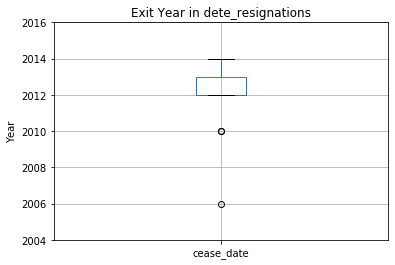

In [253]:
# Create Resignation Year boxplot
ax = dete_resignations.boxplot(column=["cease_date"])
plt.title("Exit Year in dete_resignations")
ax.set_ylim(2004,2016)
plt.ylabel("Year")
plt.show()

In [254]:
dete_resignations["cease_date"].describe()

count     300.00000
mean     2012.60000
std         0.75403
min      2006.00000
25%      2012.00000
50%      2013.00000
75%      2013.00000
max      2014.00000
Name: cease_date, dtype: float64

The boxplot and the statistics above show how the dates are distributed. The graph shows that dates earlier than 2012 are outliers, and most of the dates lie between 2012 and 2013. 

Now I will check the values for "dete_start_date" in dete_resignations and "cease_date" in tafe_resignations.

### dete_resignations["dete_start_date"]

In [255]:
dete_resignations["dete_start_date"].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

The dete_start_date values range from 1963 to 2013. This is possible, but I will want to explore the earlier ranges further. If someone was hired in in the 60s, the would most likely be around 70 years old. Below, I show a boxplot to explore this data further.

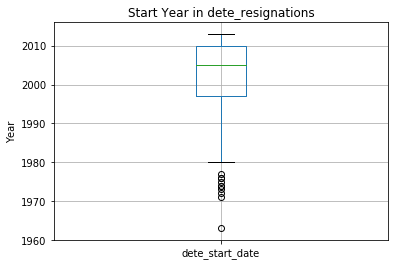

In [256]:
# Create Start Date boxplot
ax = dete_resignations.boxplot(column=["dete_start_date"])
plt.title("Start Year in dete_resignations")
ax.set_ylim(1960,2016)
plt.ylabel("Year")
plt.show()

In [257]:
# Evaluate start date stats
dete_resignations["dete_start_date"].describe()

count     283.000000
mean     2002.067138
std         9.914479
min      1963.000000
25%      1997.000000
50%      2005.000000
75%      2010.000000
max      2013.000000
Name: dete_start_date, dtype: float64

The boxplot and the statistics above show how the dates are distributed. The graph shows that dates earlier than 1980 are outliers, and most of the dates lie between 1997 and 2010. Although those dates are outliers, they are possible so they will not be removed. 

### tafe_resignations["cease_date"]

In [258]:
tafe_resignations["cease_date"].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

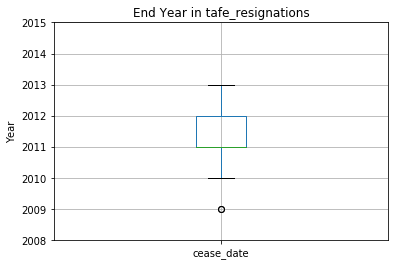

In [259]:
# Create cease_date boxplot
ax = tafe_resignations.boxplot(column=["cease_date"])
plt.title("End Year in tafe_resignations")
ax.set_ylim(2008,2015)
plt.ylabel("Year")
plt.show()

In [260]:
tafe_resignations["cease_date"].describe()

count     335.000000
mean     2011.394030
std         1.005952
min      2009.000000
25%      2011.000000
50%      2011.000000
75%      2012.000000
max      2013.000000
Name: cease_date, dtype: float64

The boxplot and the statistics above show how the dates are distributed. The graph shows that dates earlier than 2011 are outliers, and most of the dates lie between 2011 and 2012. 

### Inconsistencies Summary

Above, I evaluated the starting and ending dates in the dataframes. I did not see any years listed after the current date, and I did not see any start dates before the year 1940. There were many outliers present, but nothing that seemed inherently incorrect.

Therefore, I can verify that there aren't any major issues with the years.

## Creating New Columns - institute_service in dete_resignations

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.

The tafe_resignations dataframe already contains a "service" column, which is named "institute_service". In order to analyze both surveys together, I will create a corresponding institute_service column in dete_resignations.

In [261]:
# Create institute_service column in dete_resignations
dete_resignations.loc[:,"institute_service"] = dete_resignations.loc[:,"cease_date"]-dete_resignations.loc[:,"dete_start_date"]
dete_resignations["institute_service"].value_counts().sort_index()

C:\Users\tnet9\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\tnet9\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

In the above cell, I subtracted the start date from the resignation date in order to see the range of years worked. Employees at this company worked anywhere from 0 to 49 years before resigning. I will show this data in a boxplot below.

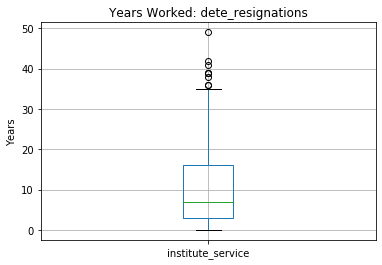

In [262]:
# Create a boxplot for Years Worked
dete_resignations.boxplot(column=["institute_service"])
plt.title("Years Worked: dete_resignations")
plt.ylabel("Years")
plt.show()

In [263]:
# Evaluate spread of institute_service
dete_resignations["institute_service"].describe()

count    273.000000
mean      10.457875
std        9.931709
min        0.000000
25%        3.000000
50%        7.000000
75%       16.000000
max       49.000000
Name: institute_service, dtype: float64

The boxplot and the statistics above show how the number of years worked are distributed. I can see that most people worked between 3 and 16 years, with any value above 35 years being an outlier. 

### Comparing to tafe_resignations["institute_service"]

In [264]:
tafe_resignations["institute_service"].value_counts(dropna=False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

institute_service in tafe_resignations is not in a numerical format, so I will need to update the information in order to compare to the other dataframe. I will clean this column after I combine the datasets.

## Resignation due to Dissatisfaction

In order to determine if the employees may have resigned due to being dissatisfied, I will look at the following columns:
- tafe_survey_updated:
    - Contributing Factors. Dissatisfaction
    - Contributing Factors. Job Dissatisfaction
- dete_survey_updated:
    - job_dissatisfaction
    - dissatisfaction_with_the_department
    - physical_work_environment
    - lack_of_recognition
    - lack_of_job_security
    - work_location
    - employment_conditions
    - work_life_balance
    - workload

If the employee indicated that any of these factors caused them to leave, I will mark them as "dissatisfied" in a new column. 

### Dissatisfaction in tafe_resignations 

I will start by converting the columns in tafe_resignations to True, False, or NaN values. If either of the columns listed above contain a True value, I will add that True value to the new "dissatisfied" column. 

In [265]:
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [266]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

For the two columns above in tafe_registrations, three values are used as inputs: "-", "NaN", and "Contributing Factors. Dissatisfaction"/"Job Dissatisfaction".

Below, I will write a function named **update_vals** that makes the following changes:
- If the value is "NaN", it will return np.nan.
- If the value is "-", it will return False.
- For any other value, it will return True.

I will then apply the function to the two columns in the tafe_registrations dataframe. 

In [267]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == "-":
        return False
    else:
        return True
    
# Create a new df with just the two col of interest
dissatisfaction_col_tafe = pd.concat([tafe_resignations["Contributing Factors. Dissatisfaction"],tafe_resignations["Contributing Factors. Job Dissatisfaction"]], axis=1)

# Create a df with the transformed columns using df.applymap()
diss_col_tafe_TF = dissatisfaction_col_tafe.applymap(update_vals)    

In [268]:
# Evaluate if results match expected results
diss_col_tafe_TF["Contributing Factors. Dissatisfaction"].value_counts(dropna=False)

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [269]:
diss_col_tafe_TF["Contributing Factors. Job Dissatisfaction"].value_counts(dropna=False)

False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

Above, I used value_counts(dropna=False) to see if the transformed columns had the expected number of Trues, Falses, and NaNs. The transformation worked as expected.

In [270]:
# Make a copy of the dataframe
tafe_resignations_up = tafe_resignations.copy()

# Create a new column in tafe_registrations_up with a True if any value in the diss_col_tafe_TF dataframe is True.
tafe_resignations_up["dissatisfied"] = diss_col_tafe_TF.any(axis=1, skipna=False)

# Evaluate new col
tafe_resignations_up["dissatisfied"].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

Above, I created a new column in the tafe_registrations and added it to the new dataframe tafe_registrations_up. This new column, "dissatisfied", contains Trues, Falses, and NaNs. The column contains True if either of the  "Contributing Factors. Dissatisfaction" or "Contributing Factors. Job Dissatisfaction" columns had True values after transformation.

This new column shows if an employee left due to dissatisfaction.

### Dissatisfaction in dete_resignations 

I will now create a dissatisfaction column in the dete_resignations dataframe. In order to see if I need to transform the columns which contain dissatisfaction data into Trues and Falses, I will examine all of the relevant columns.

Text(0.5, 0, 'Dissatisfaction Columns')

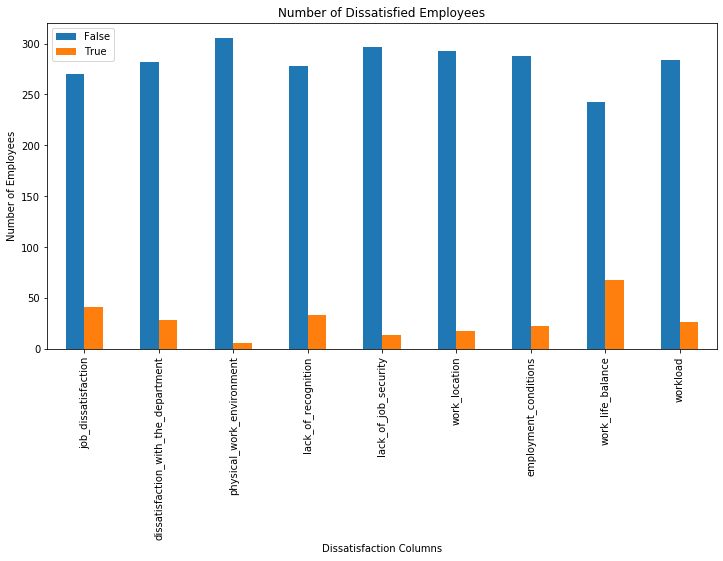

In [271]:
# Create list of dissatisfaction columns
dissatisfaction_cols = ["job_dissatisfaction", "dissatisfaction_with_the_department","physical_work_environment",
                        "lack_of_recognition","lack_of_job_security","work_location","employment_conditions",
                        "work_life_balance","workload"]

# Create a new df
dissatisfaction_df = pd.DataFrame()

# Fill dissatisfaction_df with value_counts series for each dissatisfaction column
for i in dissatisfaction_cols:
    dissatisfaction_df[i] = dete_resignations[i].value_counts(dropna=False)

# Plot dissatisfaction_df
dissatisfaction_df.transpose().plot.bar(figsize=(12,6))
plt.title("Number of Dissatisfied Employees")
plt.ylabel("Number of Employees")
plt.xlabel("Dissatisfaction Columns")

All of the relevant columns already contain data in the form of True and False, with many more Falses than Trues in each column. I will use the same df.any() method to create a "dissatisfied" column in dete_resignations.

In [272]:
# Create a new df with all dissatisfaction columns
dissatisfaction_col_dete = pd.concat([dete_resignations.iloc[:,13:20],dete_resignations.iloc[:,25:27]],axis=1)

In [273]:
# Make a copy of the dataframe and set it equal to dete_registrations_up
dete_resignations_up = dete_resignations.copy()

# Create a new column in dete_registrations_up with True if any value in dissatisfaction_col_dete is True
dete_resignations_up["dissatisfied"] = dissatisfaction_col_dete.any(axis=1, skipna=False)

In [274]:
# Evaluate "dissatisfied" column
dete_resignations_up["dissatisfied"].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

As I did for the tafe_registrations data, I created a new column in the dete_registrations and added it to the new dataframe dete_registrations_up.
This new column shows if an employee left due to dissatisfaction in any of the nine categories described above.

## Combining the Datasets

To recap, I've completed the following:
- Renamed the columns
- Dropped any data not needed for our analysis
- Verified the quality of our data
- Created a new institute_service column
- Cleaned the Contributing Factors columns
- Created a new column, "dissatisfied", indicating if an employee resigned because they were dissatisfied in some way

Now I will combine the data according to the institute_service column, which contains the years worked. This will set up the data to answer the stockholders' questions.

In [275]:
# Add a column "institute" to each dataframe to distinguish between the data

dete_resignations_up["institute"] = "DETE"
print(dete_resignations_up["institute"].value_counts())

tafe_resignations_up["institute"] = "TAFE"
print(tafe_resignations_up["institute"].value_counts())

DETE    311
Name: institute, dtype: int64
TAFE    340
Name: institute, dtype: int64


In [276]:
# Combine the two datasets (axis=0)
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

# Evaluate new dataframe
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 53 columns):
Contributing Factors. Career Move - Private Sector     332 non-null object
Contributing Factors. Career Move - Public Sector      332 non-null object
Contributing Factors. Career Move - Self-employment    332 non-null object
Contributing Factors. Dissatisfaction                  332 non-null object
Contributing Factors. Ill Health                       332 non-null object
Contributing Factors. Interpersonal Conflict           332 non-null object
Contributing Factors. Job Dissatisfaction              332 non-null object
Contributing Factors. Maternity/Family                 332 non-null object
Contributing Factors. NONE                             332 non-null object
Contributing Factors. Other                            332 non-null object
Contributing Factors. Study                            332 non-null object
Contributing Factors. Travel                           332 non-null ob

C:\Users\tnet9\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [277]:
# Drop columns with less than 500 non null values.
combined_updated = combined.dropna(axis=1,thresh=500).copy()
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
age                  596 non-null object
cease_date           635 non-null float64
dissatisfied         643 non-null object
employment_status    597 non-null object
gender               592 non-null object
id                   651 non-null float64
institute            651 non-null object
institute_service    563 non-null object
position             598 non-null object
separationtype       651 non-null object
dtypes: float64(2), object(8)
memory usage: 50.9+ KB


I have created a new dataframe called **combined_updated**. This dataframe is a combination of dete_resignations_up and tafe_resignations_up. After concatenating them, the new dataframe was filtered to only include columns with greater than 500 non null values. This dataframe now has 651 rows and 10 columns, including all of the columns I created (dissatisfied, institute, institute_service).

I will use combined_updated for the remainder of the analysis.

## Cleaning institute_service

Currently, the column institute_service has a couple of different formats:
- DETE rows have float values, and 
- TAFE rows have strings with a range of time. 

In [278]:
# Evaluate "institute_service" column
combined_updated["institute_service"].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
14.0                   6
10.0                   6
12.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
24.0                   4
11.0                   4
23.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
25.0                   2
26.0                   2
36.0                   2
28.0                   2
30.0                   2


To analyze this data, I will convert the numbers into categories. I will base my analysis on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage). It states that it is more effective to understand an employee's needs according to career stage instead of age. 

The definitions I will use for career stages are:
- New: less than 3 years at a company
- Experienced: 3 to 6 years at a company
- Established: 7 to 10 years at a company
- Veteran: 11 or more years at a company

I will categorize the values in the institute_service column using the above definitions.

The different patterns in the column are currently floats, "Less than 1 year", "More than 20 years", and [num]-[num] to show a range. Knowing these patterns will help me extract the years using vectorized string methods.

In [279]:
# Change the column to type 'str' and then use regex expression to extract first digit
combined_updated["institute_service"] = combined_updated["institute_service"].astype(str).str.extract(r'([0-9][0-9]?)',expand=False)
combined_updated["institute_service"].value_counts(dropna=False)

# The regex expression extracts the first value in the XX-XX pattern.
# This works for my analysis purposes as it will allow categorization into the correct bin.

1      159
NaN     88
3       83
5       56
7       34
11      30
0       20
20      17
6       17
4       16
9       14
2       14
8        8
13       8
15       7
17       6
10       6
22       6
12       6
14       6
16       5
18       5
23       4
24       4
39       3
32       3
19       3
21       3
25       2
36       2
30       2
28       2
26       2
27       1
33       1
31       1
49       1
38       1
29       1
34       1
35       1
41       1
42       1
Name: institute_service, dtype: int64

In [280]:
# Change values to float and evaluate 
combined_updated["institute_service"] = combined_updated["institute_service"].astype(float)
combined_updated["institute_service"].describe()

count    563.000000
mean       7.067496
std        8.251974
min        0.000000
25%        1.000000
50%        4.000000
75%       10.000000
max       49.000000
Name: institute_service, dtype: float64

In [281]:
# Evaluate to see if column is correct
combined_updated["institute_service"].value_counts(dropna=False)

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

Now that I have all of the years worked in float type, I can map each value to the career stages defined above. To do this, I will create a function that maps each year value to one of the stages. I will then use the Series.apply() method to apply the function to the series. I will save that to a new column called "service_cat".

In [282]:
# Create a function to categorize values into career stages
def map_stages(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return "New" # Less than 3 years at a company
    elif val >= 3 and val <= 6:
        return "Experienced" # 3-6 years at a company
    elif val >= 7 and val <= 10:
        return "Established" # 7-10 years at a company
    else:
        return "Veteran" # 11 or more years at a company

In [283]:
# Use Series.apply() and map_stages to transform the institute_service column
combined_updated["service_cat"] = combined_updated["institute_service"].apply(map_stages)

# Check the results of the apply method
print(combined_updated["service_cat"].head())
combined_updated["service_cat"].value_counts(dropna=False)

0    Established
1        Veteran
2    Experienced
3        Veteran
4    Experienced
Name: service_cat, dtype: object


New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

Text(0.5, 1.0, 'Number of Employees per Career Stage')

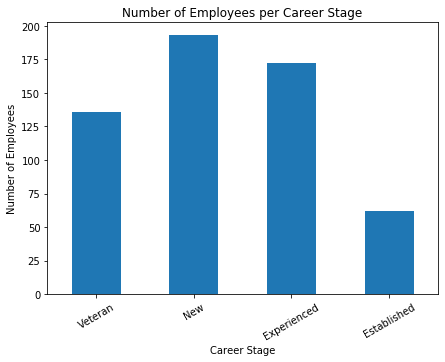

In [284]:
# Make bar graph to show results of service_cat
combined_updated["service_cat"].value_counts(sort=False).plot.bar(figsize=(7,5),rot=30)
plt.ylabel("Number of Employees")
plt.xlabel("Career Stage")
plt.title("Number of Employees per Career Stage")

In this section, I cleaned the institute_service column and grouped the values into different categories to reflect the career stages of the employees who resigned. This information will be used in the next step to analyze why different stage employees left their jobs. 

## Cleaning the Age Column

In order to answer the question about dissatisfaction and age, I need to evaluate and clean the "age" column. 

In [285]:
combined_updated["age"].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
26  30           32
31  35           32
21-25            29
56 or older      29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

I can see that the data for age is stored in two different ways: with two spaces between ages or a "-". I will make the column consistent and replace the spaces with a "-".

In [286]:
# Convert age column to str
combined_updated["age"] = combined_updated["age"].astype(str)

# Clean age column and put it in a new column age_cleaned
combined_updated["age_cleaned"] = combined_updated["age"].str.replace("  ","-").str.replace("56 or older", "56-60")

# Change nan values to null values
combined_updated.loc[combined_updated["age_cleaned"] == "nan", "age_cleaned"] = np.nan

# Evaluate cleaned column
combined_updated["age_cleaned"].value_counts(dropna=False).sort_index()

20 or younger    10
21-25            62
26-30            67
31-35            61
36-40            73
41-45            93
46-50            81
51-55            71
56-60            55
61 or older      23
NaN              55
Name: age_cleaned, dtype: int64

In this section, I cleaned the age column in order to have consistent values across the dataset. This information will be used in the next step to analyze why employees at different ages left their jobs. 

## Analysis: Resignation due to Dissatisfaction

Now that I have a column to describe the career stages of the employees who have resigned, I can begin to answer the posed questions:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

To start, I will fill in the missing values in the "dissatisfied" column and then aggregate the data. 
The "dissatisfied" column consists of Boolean values; a pivot table treats Boolean values as integers, so True = 1 and False = 0. I can use that to aggregate the "dissatisfied" column and calculate a variety of statistics.

### Prepping "Dissatisfied" Column

In [287]:
# Confirm numbers in dissatisfied column
combined_updated["dissatisfied"].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [288]:
# Replace NaN values with the more frequent value: False
combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(False)
combined_updated["dissatisfied"].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

### Career Stage and Dissatisfaction
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

In [289]:
# Use a pivot table to calculate the percentage of dissatisfied employees in each career stage
cat_dis_pt = combined_updated.pivot_table(index="service_cat",values="dissatisfied", 
                             aggfunc=np.mean) # mean is default arg
print(cat_dis_pt)

             dissatisfied
service_cat              
Established      0.516129
Experienced      0.343023
New              0.295337
Veteran          0.485294


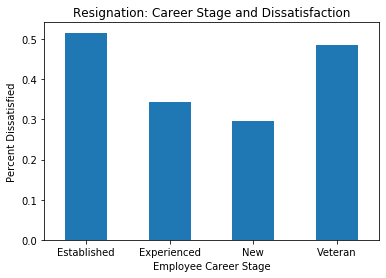

In [290]:
# Plot pivot table
cat_dis_pt.plot(kind="bar", rot = 0, legend=False,
                title="Resignation: Career Stage and Dissatisfaction")
plt.xlabel("Employee Career Stage")
plt.ylabel("Percent Dissatisfied")
plt.show()

The above bar graph answers the first set of questions: 

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? 
What about employees who have been there longer?

New employees (under 3 years employment) resigned due to dissatisfaction less than other the other groups. Only 29.5% of resigned new employees reported any dissatisfaction.

The later career stage employees showed a rise in resignation due to dissatisfaction, with 34.3% of "Experienced" employees and 51.6% of "Established" claiming some dissatisfaction. The percentage decreased for "Veteran" employees, going down to 48.5%.

**In summary, newer employees are resigning due to dissatisfaction less than employees who have been at the company longer. Employees at a company for 7 to 10 years ("Established") are most at risk.**


### Age and Dissatisfaction
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


In [291]:
# Use a pivot table to calculate the percentage of dissatisfied employees in each age group
age_dis_pt = combined_updated.pivot_table(index="age_cleaned",values="dissatisfied").iloc[0:10,:] 
# iloc selection removes nan values

age_dis_pt

,dissatisfied
age_cleaned,
20 or younger,0.200000
21-25,0.306452
26-30,0.417910
31-35,0.377049
36-40,0.342466
41-45,0.376344
46-50,0.382716
51-55,0.422535
56-60,0.381818


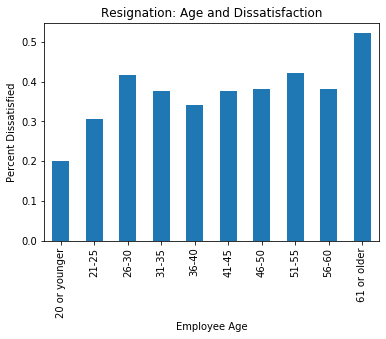

In [292]:
# Plot pivot table
age_dis_pt.plot(kind="bar", rot = 90, legend=False,
                title="Resignation: Age and Dissatisfaction")
plt.xlabel("Employee Age")
plt.ylabel("Percent Dissatisfied")
plt.show()

The above bar graph answers the second set of questions: 

Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Younger employees resigned due to dissatisfaction less than other the other groups, with only around 20% of employees aged 20 or younger reporting dissatisfaction.

The group with the largest percentage of resigned employees claiming dissatisfaction is 61 or older, with a percentage of 52%.

Employees between 26 and 60 resign due to dissatisfaction at a rate of 34-42%, which rests in the middle.

**In summary, the youngest employees have the lowest rate of resigning due to dissatisfaction, and the oldest employees have the highest rate.**

# Summary

The analysis so far has showed that the groups most at risk of resigning due to dissatisfaction are the older employees (61 or older) or those who have been at the company 7 to 10 years (Established). The groups least at risk are the employees who are 21 and younger or those who have been at the company less than three years (New).

# Further Exploration

I have answered all of the specific questions posed by the stockholders, but the data has a lot more interesting trends to report on. 

First, I will look into how both career stage and age together impact dissatisfaction rates in resigned employees instead of each factor individually. Then I will look into the effects of institute and position. 

## Effects of Career Stage and Age

In [293]:
# Use a pivot table to calculate the percentage of dissatisfied employees in each age group
dis_pt = combined_updated.pivot_table(index="service_cat",columns="age_cleaned",values="dissatisfied")
dis_pt = dis_pt.iloc[:,0:10] # Remove NaN column in pivot table
dis_pt.head()

age_cleaned,20 or younger,21-25,26-30,31-35,36-40,41-45,46-50,51-55,56-60,61 or older
service_cat,,,,,,,,,,
Established,NaN,0.000000,0.545455,0.75,0.400000,0.666667,0.363636,0.500000,0.333333,0.500000
Experienced,0.333333,0.285714,0.444444,0.30,0.380952,0.413793,0.285714,0.250000,0.250000,0.500000
New,0.142857,0.297297,0.320000,0.25,0.347826,0.233333,0.368421,0.318182,0.400000,NaN
Veteran,NaN,NaN,NaN,0.40,0.285714,0.500000,0.545455,0.600000,0.387097,0.642857


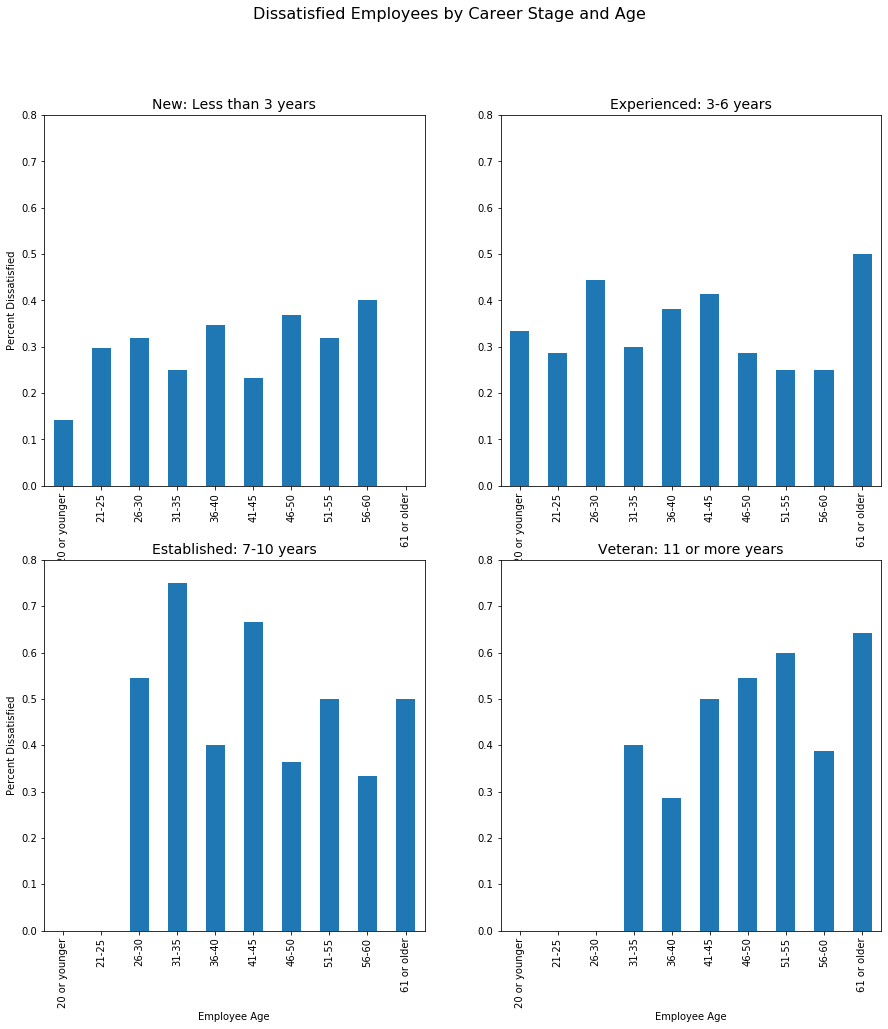

In [298]:
# Create a fig to put in 4 subplots
fig=plt.figure(figsize=(15,15))
fig.suptitle('Dissatisfied Employees by Career Stage and Age', fontsize=16)

ax = plt.subplot("221")
# Select only the "New" row
dis_pt.iloc[2,:].plot(kind="bar", ax= ax)
plt.ylabel("Percent Dissatisfied")
ax.set_title("New: Less than 3 years",fontsize=14)
ax.set_ylim([0, .8])

ax = plt.subplot("222")
dis_pt.iloc[1,:].plot(kind="bar", ax= ax)
ax.set_title("Experienced: 3-6 years",fontsize=14)
ax.set_ylim([0, .8])

ax = plt.subplot("223")
dis_pt.iloc[0,:].plot(kind="bar", ax= ax)
plt.xlabel("Employee Age")
plt.ylabel("Percent Dissatisfied")
ax.set_title("Established: 7-10 years",fontsize=14)
ax.set_ylim([0, .8])

ax = plt.subplot("224")
dis_pt.iloc[3,:].plot(kind="bar", ax= ax)
plt.xlabel("Employee Age")
ax.set_title("Veteran: 11 or more years",fontsize=14)
ax.set_ylim([0, .8])

plt.show()

Based on the plots above, I can see that in the New, Experienced, and Veteran groups, the oldest employees are the most likely to claim dissatisfaction at resignation. This matches the individual age assessment.

The Established employees do not follow this trend, however, showing the highest dissatisfaction claims for employees 31-35 years old, followed by 41-45 years, and then 26-30 years. 

The group with the lowest claim to resigning due to dissatisfaction is the new employees who are 20 or younger. This also fits the individual assessment above. 

The group with the highest dissatisfaction claim is the 31-35 year old established employees (7 to 10 years). Based on their age and the time at the company, this was most likely a first or second job. 

## Comparing Institutes: DETE vs TAFE

I want to now evaluate the difference in resigning due to dissatisfaction between the two institutes, DETE and TAFE. I can do this by creating a pivot table and plotting the results.

In [299]:
# Compare number of TAFE vs DETE rows
combined_updated["institute"].value_counts(dropna=False)

TAFE    340
DETE    311
Name: institute, dtype: int64

### Dissatisfaction per Institute

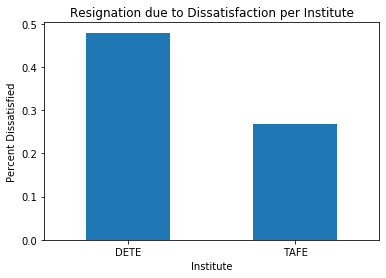

In [300]:
inst_pt = combined_updated.pivot_table(index="institute",values="dissatisfied") 
inst_pt.plot(kind="bar", rot = 0, legend=False,
                title="Resignation due to Dissatisfaction per Institute")
plt.xlabel("Institute")
plt.ylabel("Percent Dissatisfied")
plt.show()

Based on this analysis, I can see that employees in DETE claimed dissatisfaction was a part of their resignation decision at a much higher rate than TAFE employees. 

Below I will explore to see how the institutes compare looking at age and career stage as variables.

### Effects of Career Stage on Dissatisfaction per Institute

In [321]:
# Create a pivot table to evaluate the effects of career stage and institute on dissatisfaction
inst_pt1 = combined_updated.pivot_table(index="service_cat",columns="institute",values="dissatisfied")
inst_pt1

institute,DETE,TAFE
service_cat,,
Established,0.609756,0.333333
Experienced,0.460526,0.250000
New,0.375000,0.262774
Veteran,0.560000,0.277778


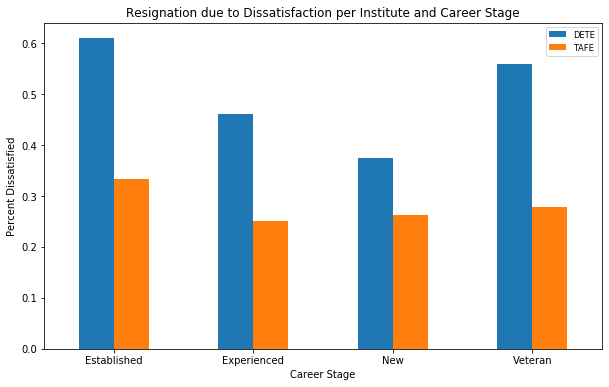

In [322]:
# Plot pivot table
inst_pt1.plot(kind="bar", rot = 0,
                title="Resignation due to Dissatisfaction per Institute and Career Stage", figsize=(10,6))
plt.xlabel("Career Stage")
plt.ylabel("Percent Dissatisfied")
plt.legend(loc=0,fontsize="small") #legend loc in best place, small font
plt.show()

The graph above shows that DETE and TAFE have similar patterns of dissatisfaction, with Established and Veteran employees showing the highest rate. DETE is higher in all cases.

### Effects of Employee Age on Dissatisfaction per Institute

In [318]:
# Create a pivot table to evaluate the effects of age and institute on dissatisfaction
inst_pt2 = combined_updated.pivot_table(index="age_cleaned",columns="institute",values="dissatisfied") # mean is default arg
inst_pt2

institute,DETE,TAFE
age_cleaned,,
20 or younger,0.000000,0.222222
21-25,0.310345,0.303030
26-30,0.571429,0.250000
31-35,0.551724,0.218750
36-40,0.390244,0.281250
41-45,0.479167,0.266667
46-50,0.452381,0.307692
51-55,0.593750,0.282051
56-60,0.576923,0.206897


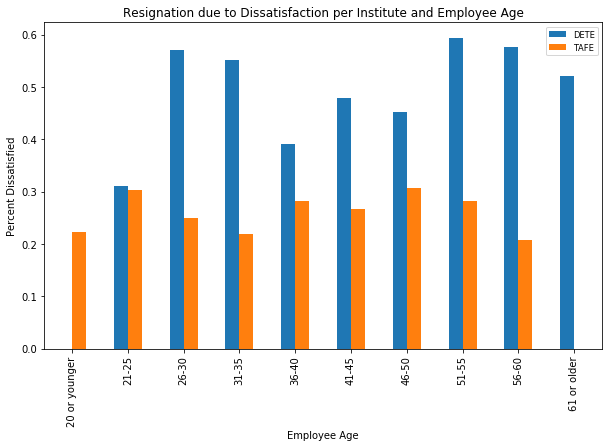

In [320]:
# Plot pivot table
inst_pt2.plot(kind="bar", rot = 90,
                title="Resignation due to Dissatisfaction per Institute and Employee Age", figsize=(10,6))
plt.xlabel("Employee Age")
plt.ylabel("Percent Dissatisfied")
plt.legend(loc=0,fontsize="small") #legend loc in best place, small font
plt.show()

The graph above looks at how dissatisfaction scores compare between the two institutes looking at employee age. DETE again shows the highest rate in every category. However, employees aged 21 to 25 are very similar between each institute. I can also see that the two institutes show differences in regards to age with 46-50 showing highest dissatisfaction in TAFE and 51-55 highest in DETE. 

### Institute Summary

The differences between the institutes look very significant, but it is important to remember that there were 9 columns to describe dissatisfaction in the DETE survey, and two in TAFE. As I marked dissatisfaction as True if any of the variables were maked True, there is a higher likelyhood that DETE values would end up with a higher dissatisfaction score. 

The differences could also come from a difference in job position, or some other factor not yet evaluated.

## Effects of "Position"

I would like to see if position affects resignation due to dissatisfaction. First, I will need to make the values more consistent across institutes.

In [311]:
combined_updated["position"].value_counts(dropna=False)

Administration (AO)                                        148
Teacher                                                    129
Teacher (including LVT)                                     95
Teacher Aide                                                63
NaN                                                         53
Cleaner                                                     39
Public Servant                                              30
Professional Officer (PO)                                   16
Operational (OO)                                            13
Head of Curriculum/Head of Special Education                10
School Administrative Staff                                  8
Technical Officer                                            8
Schools Officer                                              7
Workplace Training Officer                                   6
School Based Professional Staff (Therapist, nurse, etc)      5
Technical Officer (TO)                                 

I can see that there are two different names for the same position in multiple cases. Below, I will explore how the positions break down between institutes. 

In [312]:
print("DETE Careers")
combined_updated.loc[combined_updated["institute"] == "DETE","position"].value_counts()

DETE Careers


Teacher                                                    129
Teacher Aide                                                63
Cleaner                                                     39
Public Servant                                              30
Head of Curriculum/Head of Special Education                10
Technical Officer                                            8
School Administrative Staff                                  8
Schools Officer                                              7
School Based Professional Staff (Therapist, nurse, etc)      5
Guidance Officer                                             3
Other                                                        3
Professional Officer                                         2
Business Service Manager                                     1
Name: position, dtype: int64

In [313]:
print("TAFE Careers")
combined_updated.loc[combined_updated["institute"] == "TAFE","position"].value_counts()

TAFE Careers


Administration (AO)           148
Teacher (including LVT)        95
Professional Officer (PO)      16
Operational (OO)               13
Workplace Training Officer      6
Technical Officer (TO)          5
Executive (SES/SO)              4
Tutor                           3
Name: position, dtype: int64

Looking at the positions from each institute, I can see that there is significant overlap in titles, but the names are different. For example, a teacher in the DETE institute was logged as "Teacher", but as "Teacher (including LVT)" in the TAFE institute. 

Making the titles consistent may assist in the evaluation of the effects of position on resigning due to dissatisfaction.

In [314]:
# Update position vales to be more consistent across institutes
combined_updated = combined_updated.replace({"position" : { "Teacher (including LVT)" : "Teacher", 
                                                           "School Administrative Staff" : "Administration", 
                                                           "Administration (AO)" : "Administration" , 
                                                           "Technical Officer (TO)" : "Technical Officer", 
                                                           "Professional Officer (PO)" : "Professional Officer", 
                                                           "Operational (OO)" : "Operational Officer"}})

In order to see the effect of position on reasons for resignation, I will create a graph to visualize the differences. 

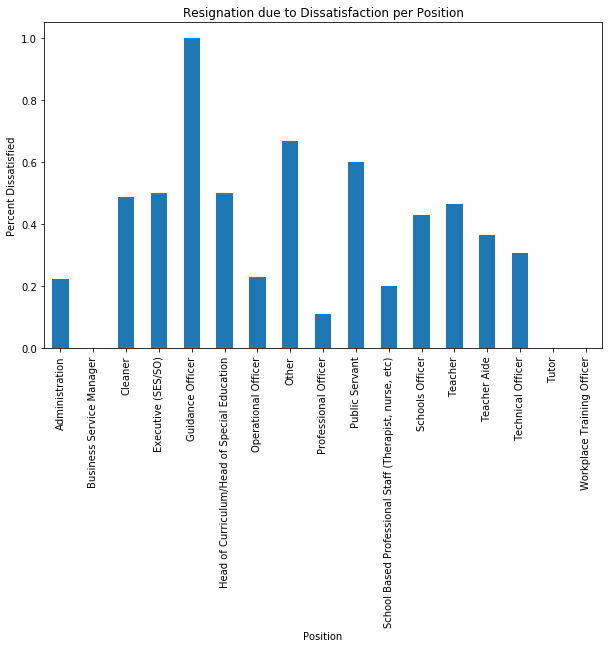

In [315]:
# Plot Dissatisfaction due to Position
pos_pt1 = combined_updated.pivot_table(index="position",values="dissatisfied") # mean is default arg
pos_pt1.plot(kind="bar", rot = 90, legend=False,
                title="Resignation due to Dissatisfaction per Position", figsize=(10,6))
plt.xlabel("Position")
plt.ylabel("Percent Dissatisfied")
plt.show()

In the graph above, I can see some dramatic results, with Guidance Officers at 1, and Business Service Managers, Tutors, and Workplace Training Officers at 0. This could be due to a unanimous response on dissatisfaction, or a small sample size. I will check the number of responders below.

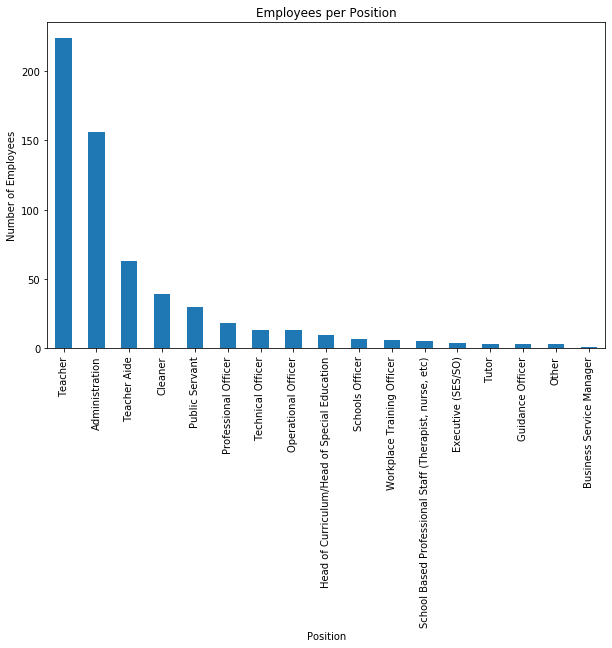

In [316]:
# Plot number of employees per position
num = combined_updated["position"].value_counts()
num.plot(kind="bar", title="Employees per Position", figsize=(10,6))
plt.xlabel("Position")
plt.ylabel("Number of Employees")
plt.show()

### Position Summary

I can see that all of the positions at 1 and 0, like Guidance Officer, Business Service Manager, Tutor, and Workplace Training Officer, have very low numbers of employees, which makes the results less significant. 

The positions with the most employees, like Teacher, Administration, Teacher Aide, Cleaner, and Public Servant have dissatisfaction results between 0.2 and 0.6, with Administration having the lowest value and Public Servant having the highest.

# Conclusions

This investigation has shown a number of interesting results. When looking at who resigned due to dissatisfaction, I found trends in age, career stage, institute worked at, and position. In regards to:

- Age
    - Older employees (61 or older) had the highest rate of dissatisfaction.
    - Employees 21 and younger had the lowest rate.

- Career Stage
    - Established employees, those who have been at the company 7 to 10 years, had the highest rate of dissatisfaction. 
    - New employees, those who have been at the company less than three years, had the lowest rate.

- Age and Career Stage Combined
    - Established employees (7 to 10 years) 31 to 35 years old had the highest rate of dissatisfaction.
    - New employees (< 3 years) 20 years or younger had the lowest rate.

- Institute
    - DETE employees had a higher rate of resignation due to dissatisfaction than TAFE employees in all ages and career stages. 
    - Remember: there were many more dissatisfaction columns in DETE (9 vs. 2).

- Position (positions with more than 25 respondents)
    - Public Servants had the highest rate of dissatisfaction.
    - Administration had the lowest rate.

There are significantly more findings within the data. Other areas that could be explored might be why different groups leave the company, differences in gender, when do people retire, and who gets fired (and is there a link with dissatisfaction). 

Why individuals leave a company is important to understand, as it can help companies better retain employees and save money.

Thank you for reading! 

-This is a very expanded DataQuest assignment.